In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).\
                  filter(Measurement.date > "2016-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(scores, columns=['date', 'precipitation'])
scores_df.set_index('date', inplace=True, )

# Sort the dataframe by date
scores_df.sort_index(inplace=True)

Text(0, 0.5, 'inches')

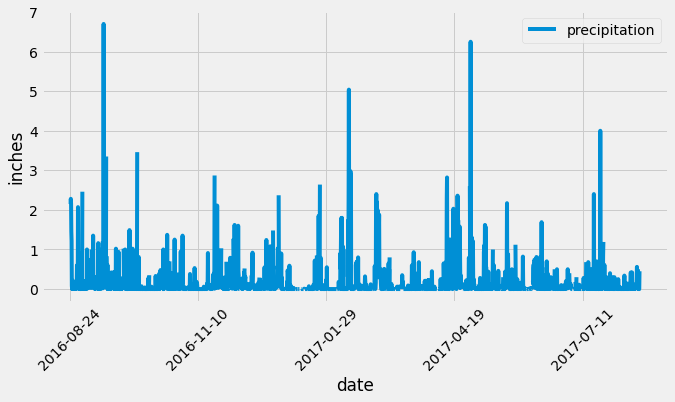

In [55]:
# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot(kind="line",
               figsize=(10, 5), 
               rot="45")

plt.xlabel("date")
plt.ylabel("inches")


In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
scores_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [50]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station).desc())).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = "USC00519281"

min_max_avg_tobs = [Measurement.station, 
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs)]

station_tobs = session.query(* min_max_avg_tobs).\
    filter(Measurement.station == most_active_station).all()[0]

station_tobs

('USC00519281', 71.66378066378067, 85.0, 54.0)

In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.date).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date.desc()).first()


('2017-08-18')

In [67]:
statement = session.query(Measurement).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date > "2016-08-18").statement

statement_df = pd.read_sql_query(stmt, session.bind)
statement_df.head()

,id,station,date,prcp,tobs
0,14604,USC00519281,2016-08-19,0.31,79.0
1,14605,USC00519281,2016-08-20,0.13,81.0
2,14606,USC00519281,2016-08-21,0.08,79.0
3,14607,USC00519281,2016-08-22,2.32,78.0
4,14608,USC00519281,2016-08-23,1.79,77.0


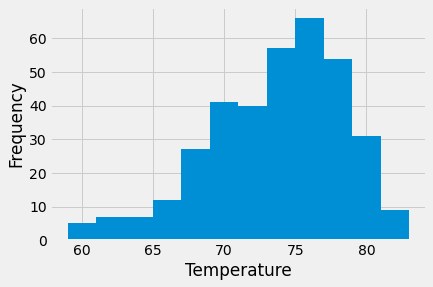

In [75]:
x_axis = statement_df["tobs"]
y_axis = bins = 12

plt.hist(x_axis, y_axis)

plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close session

In [16]:
# Close Session
session.close()